In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('ATLAST.csv')
df.head()

,id,meter_id,timestamp,current,voltage,frequency,power_factor,energy,real_power,apparent_power
0,154455,NaN,2021-09-17T13:44:11.565462,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,154454,NaN,2021-09-17T13:29:23.225921,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,154453,LAG001,2021-09-17T10:23:52.002952,0.44,240.0,50.0,1.0,130.0,NaN,NaN
3,154452,LAG001,2021-09-17T10:23:40.926723,0.44,240.0,50.0,1.0,130.0,NaN,NaN
4,154451,LAG001,2021-09-17T10:23:30.110948,0.44,240.0,50.0,1.0,130.0,NaN,NaN


In [3]:
#calculate apparent power

df['apparent_power'] = df['current']*df['voltage']

#calculate real power

df['real_power'] = df['power_factor']/ df['apparent_power']

In [4]:
#drop nan from the categorical meter_id column and reset index

df.dropna(subset = ["meter_id"], inplace=True)
df.reset_index(drop=True, inplace=True)

#replace inf in real_power with 0
df.replace(to_replace= np.nan, value =0, inplace=True )

In [5]:
#convert timestamp to datetime
import datetime as dt

df['timestamp'] = pd.to_datetime(df['timestamp'],
                                      format = '%Y-%m-%dT%H:%M:%S',
                                      errors = 'coerce')

In [6]:
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['week'] = df['timestamp'].dt.week
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['second'] = df['timestamp'].dt.second
df['day_of_week'] = df['timestamp'].dt.dayofweek

In [7]:
#create a period column

df['period'] = (df['hour'] % 24 + 4) // 4
df['period'].replace({1:'Late Night',
                                 2: 'Early Morning',
                                 3: 'Morning',
                                 4: 'Noon',
                                 5: 'Evening',
                                 6: 'Night'}, inplace= True) 

In [8]:
#Encode the period column to numerical

df['period_num']= df.period.map({
    'Early Morning': 0,
    'Morning': 1, 'Noon': 2, 'Evening': 3, 
    'Night': 4, 'Late Night': 5})

#save clean data to a csv file

df.to_csv("Clean_Energy_AllData.csv", index =False)

In [9]:
df.head()

,id,meter_id,timestamp,current,voltage,frequency,power_factor,energy,real_power,apparent_power,year,month,week,day,hour,minute,second,day_of_week,period,period_num
0,154453,LAG001,2021-09-17 10:23:52.002952,0.44,240.0,50.0,1.0,130.0,0.00947,105.6,2021,9,37,17,10,23,52,4,Morning,1
1,154452,LAG001,2021-09-17 10:23:40.926723,0.44,240.0,50.0,1.0,130.0,0.00947,105.6,2021,9,37,17,10,23,40,4,Morning,1
2,154451,LAG001,2021-09-17 10:23:30.110948,0.44,240.0,50.0,1.0,130.0,0.00947,105.6,2021,9,37,17,10,23,30,4,Morning,1
3,154450,LAG001,2021-09-17 10:23:19.423621,0.44,240.0,50.0,1.0,130.0,0.00947,105.6,2021,9,37,17,10,23,19,4,Morning,1
4,154449,LAG001,2021-09-17 10:23:08.396163,0.44,240.0,50.0,1.0,130.0,0.00947,105.6,2021,9,37,17,10,23,8,4,Morning,1


In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,141310.0,7.395141e+04,43310.338521,2.0,37927.250000,73305.500000,108661.750000,154453.00
current,141310.0,1.830914e+00,4.570296,0.0,0.240000,0.540000,1.610000,75.01
voltage,141310.0,1.785476e+02,45.749813,0.0,159.200000,188.800000,212.380000,317.22
frequency,141310.0,4.970147e+01,4.939150,0.0,50.100000,50.200000,50.300000,61.40
power_factor,141310.0,7.243995e-01,0.268708,0.0,0.600000,0.790000,0.960000,1.00
energy,141310.0,2.521507e+02,14647.595579,0.0,13.478178,73.580025,154.327205,3178480.00
real_power,141310.0,inf,NaN,0.0,0.003001,0.005586,0.013610,inf
apparent_power,141310.0,3.610080e+02,957.088855,0.0,32.614000,117.450000,285.090000,17889.00
year,141310.0,2.020363e+03,0.493194,2000.0,2020.000000,2020.000000,2021.000000,2021.00
month,141310.0,7.841575e+00,3.894553,1.0,3.000000,9.000000,11.000000,12.00


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141310 entries, 0 to 141309
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              141310 non-null  int64         
 1   meter_id        141310 non-null  object        
 2   timestamp       141310 non-null  datetime64[ns]
 3   current         141310 non-null  float64       
 4   voltage         141310 non-null  float64       
 5   frequency       141310 non-null  float64       
 6   power_factor    141310 non-null  float64       
 7   energy          141310 non-null  float64       
 8   real_power      141310 non-null  float64       
 9   apparent_power  141310 non-null  float64       
 10  year            141310 non-null  int64         
 11  month           141310 non-null  int64         
 12  week            141310 non-null  int64         
 13  day             141310 non-null  int64         
 14  hour            141310 non-null  int

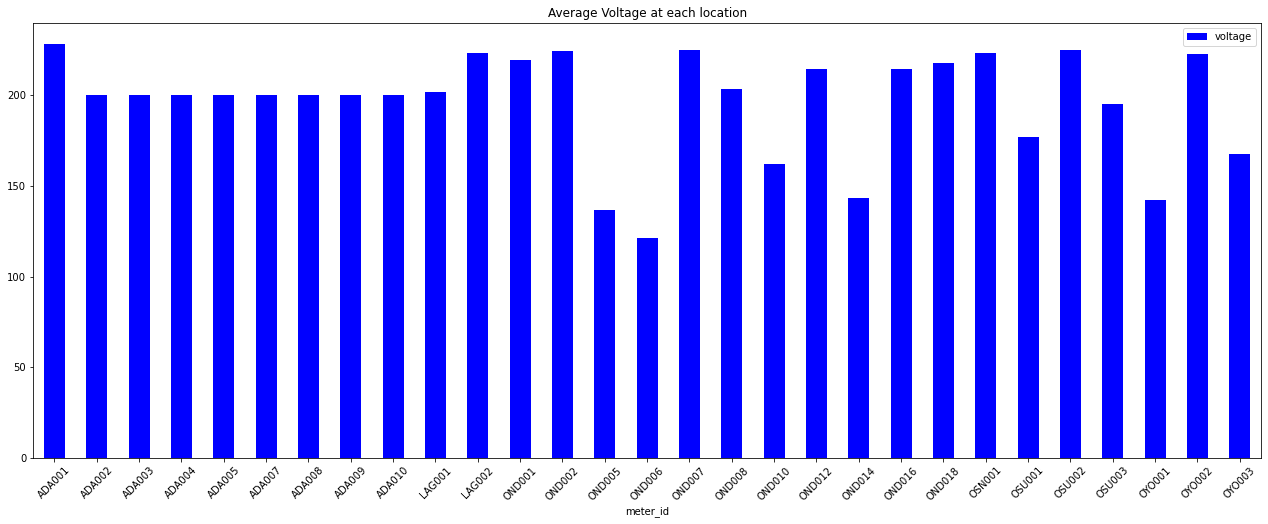

In [12]:
#average voltage at each location

table = pd.pivot_table(df, values = 'voltage', index=['meter_id'], aggfunc ='mean')
table.plot.bar(color= ("blue"), rot =0, figsize =(22,8))
plt.title("Average Voltage at each location")
plt.xticks(rotation= 45)
plt.show()

In [13]:
#copy the first populous data

osu1= df[(df['meter_id'] == 'OSU001')].copy()
ond5= df[(df['meter_id'] == 'OND005')].copy()
osu3= df[(df['meter_id'] == 'OSU003')].copy()
ond14= df[(df['meter_id'] == 'OND014')].copy()
ond2= df[(df['meter_id'] == 'OND002')].copy()

In [14]:
#deleted the outlier of year 2000

ond5['year'].value_counts().to_frame()
ond5 = ond5[ond5.year != 2000]
ond5['year'].value_counts().to_frame()

,year
2020,13253
2021,4451


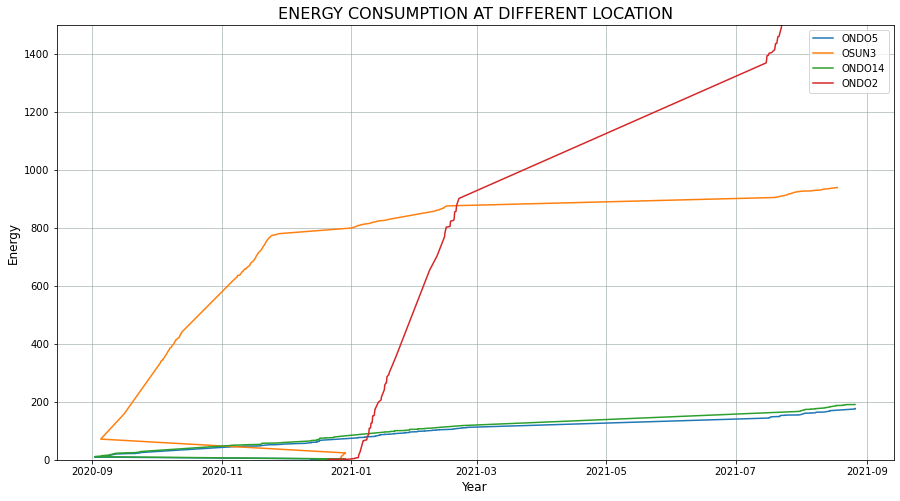

In [15]:
#Energy Consumption at DIFF LOCATION WITHOUT OSU01

plt.figure(figsize=(15,8))

#plt.plot(osu1['timestamp'], osu1['energy'], label = " OSUN1", linestyle="-")
plt.plot(ond5['timestamp'], ond5['energy'] , label = "ONDO5", linestyle="-")
plt.plot(osu3['timestamp'], osu3['energy'], label = "OSUN3", linestyle="-")
plt.plot(ond14['timestamp'], ond14['energy'], label = "ONDO14", linestyle="-")
plt.plot(ond2['timestamp'], ond2['energy'], label = "ONDO2", linestyle="-" )

plt.legend()
plt.ylim(0,1500)
plt.grid(True, color="#93a1a1", alpha=0.7)

plt.title("ENERGY CONSUMPTION AT DIFFERENT LOCATION", fontsize=16)
plt.xlabel('Year',  fontsize=12 )
plt.ylabel('Energy', fontsize=12)
#plt.style.use(
#  'dark_background')


#plt.show()
plt.savefig('Energy Consumption at different Location.png', bbox_inches='tight', transparent= True)

In [16]:
#styles for saving pictures
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

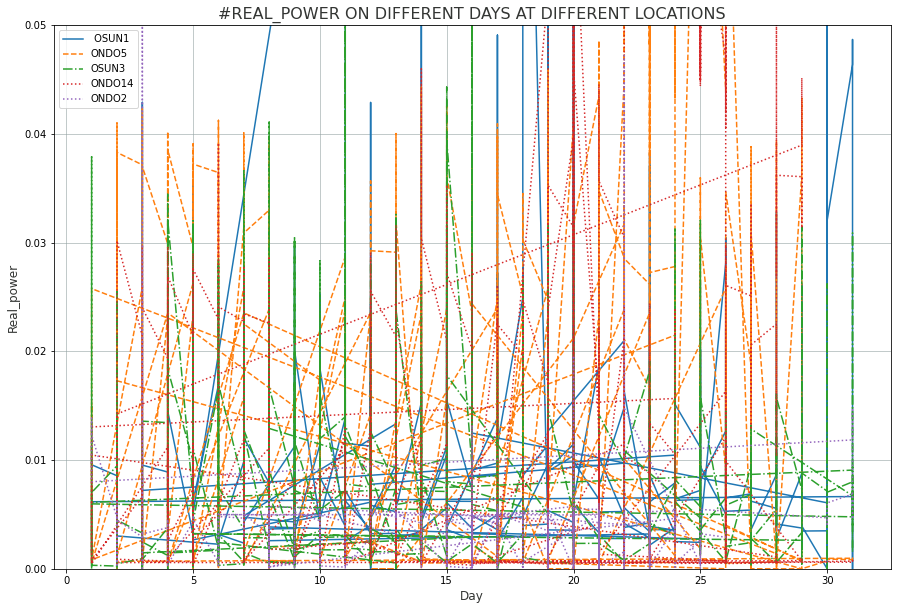

In [17]:
##REAL_POWER ON DIFFERENT DAYS at different locations

fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(osu1['day'], osu1['real_power'], label = " OSUN1", linestyle="-")
plt.plot(ond5['day'], ond5['real_power'] , label = "ONDO5", linestyle="--")
plt.plot(osu3['day'], osu3['real_power'], label = "OSUN3", linestyle="-.")
plt.plot(ond14['day'], ond14['real_power'], label = "ONDO14", linestyle=":")
plt.plot(ond2['day'], ond2['real_power'], label = "ONDO2", linestyle=":" )

plt.legend()
plt.ylim(0,0.05)
plt.grid(True, color="#93a1a1", alpha=0.7)

plt.title("#REAL_POWER ON DIFFERENT DAYS AT DIFFERENT LOCATIONS", fontsize=16, color="#333533")
plt.xlabel('Day',  fontsize=12, color="#333533")
plt.ylabel('Real_power', fontsize=12, color="#333533")

plt.show()

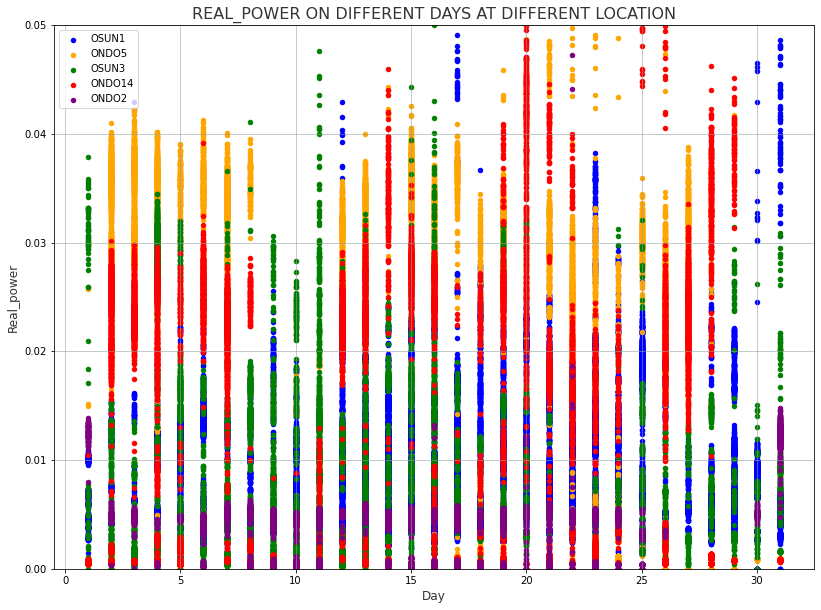

In [18]:
#REAL_POWER ON DIFFERENT DAYS

#ax = osu1['energy'].plot(x='timestamp', y='energy',label='OSUN1', color='orange', kind='hist')
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(121)

osu1.plot(x='day', y='real_power',label='OSUN1', color='blue', kind='scatter', ax=ax)
ax =  ond5.plot(x='day', y='real_power',label='ONDO5', color='orange', kind='scatter', ax=ax)
ax = osu3.plot(x='day', y='real_power',label='OSUN3', color='green', kind='scatter', ax=ax)
ax = ond14.plot(x='day', y='real_power',label='ONDO14', color='red', kind='scatter', ax=ax)
ax = ond2.plot(x='day', y='real_power',label='ONDO2', color='purple', kind='scatter', ax=ax)

plt.legend()
plt.ylim(0,0.05)
plt.grid(True, color="#93a1a1", alpha=0.7)

plt.title("REAL_POWER ON DIFFERENT DAYS AT DIFFERENT LOCATION", fontsize=16, color="#333533")
plt.xlabel('Day',  fontsize=12, color="#333533")
plt.ylabel('Real_power', fontsize=12, color="#333533")

plt.show()

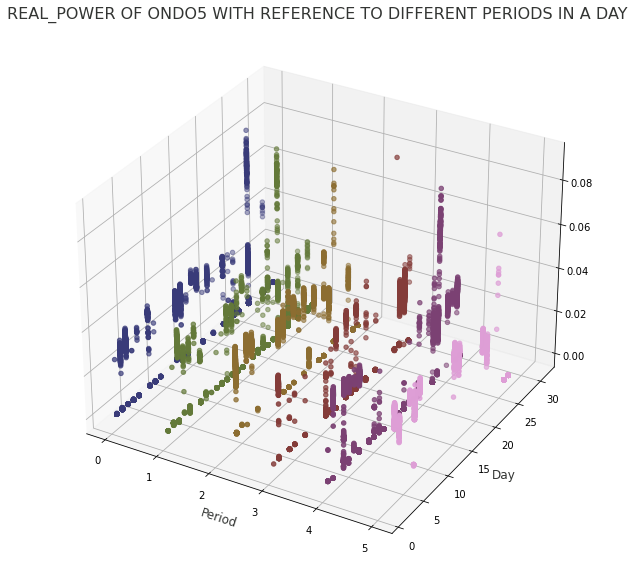

In [19]:
#REAL_POWER OF ONDO5 WITH REFERENCE TO DIFFERENT PERIODS IN A DAY for Ondo5

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(30, 10))
ax = plt.axes(projection="3d")

ax.scatter3D(xs=ond5['period_num'], ys=ond5['day'], zs=ond5['real_power'], cmap='tab20b', c=ond5['period_num'])

plt.title("REAL_POWER OF ONDO5 WITH REFERENCE TO DIFFERENT PERIODS IN A DAY", fontsize=16, color="#333533")
plt.xlabel('Period',  fontsize=12, color="#333533")
plt.ylabel('Day', fontsize=12, color="#333533")
#RdPu, PiYG, autumn
plt.savefig('REAL_POWER OF ONDO5 WITH REFERENCE TO DIFFERENT PERIODS IN A DAY.png', bbox_inches='tight', transparent= True)

plt.show()

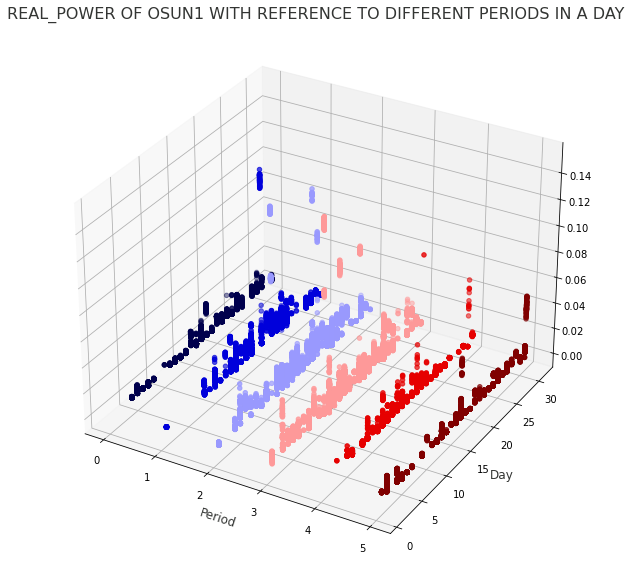

In [20]:
#REAL_POWER OF ONDO5 WITH REFERENCE TO DIFFERENT PERIODS IN A DAY for Osu15

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(xs=osu1['period_num'], ys=osu1['day'], zs=osu1['real_power'], cmap='seismic', c=osu1['period_num'])

plt.title("REAL_POWER OF OSUN1 WITH REFERENCE TO DIFFERENT PERIODS IN A DAY", fontsize=16, color="#333533")
plt.xlabel('Period',  fontsize=12, color="#333533")
plt.ylabel('Day', fontsize=12, color="#333533")
#RdPu, PiYG, autumn

plt.savefig('REAL_POWER OF ONDO5 WITH REFERENCE TO DIFFERENT PERIODS IN A DAY.png', bbox_inches='tight', transparent= True)

plt.show()

<AxesSubplot:xlabel='day', ylabel='real_power'>

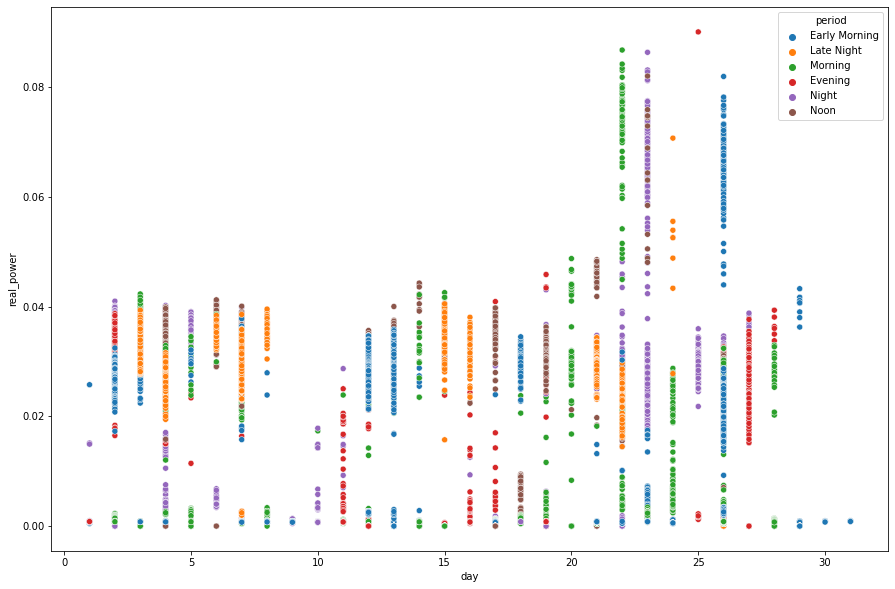

In [21]:
#Plot real_power Per Period for 30 days

plt.figure(figsize=(15,10))
sns.scatterplot(x="day",
                    y="real_power",
                    hue="period",
                    data=ond5)

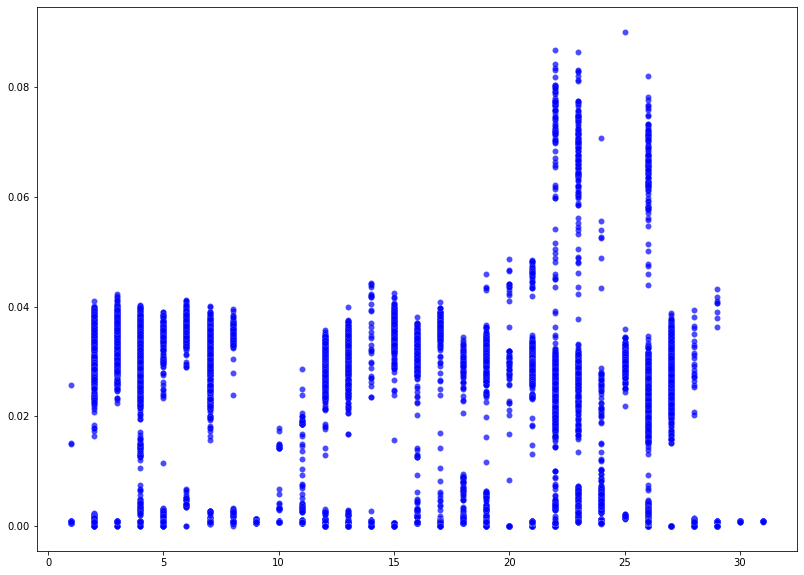

In [22]:
#Plot real_power for 30 days

fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(121)
ax.scatter(x=ond5['day'], y=ond5['real_power'], color = "blue", edgecolors = "white", linewidths = 0.1, alpha = 0.7)

<Figure size 2160x720 with 0 Axes>

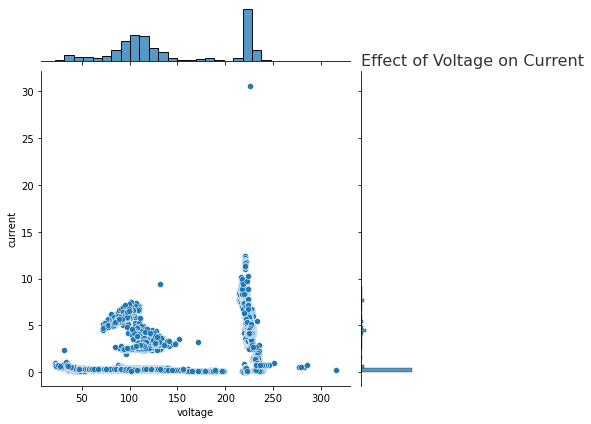

In [ ]:
#Effect of Voltage on Current

fig = plt.figure(figsize=(30, 10))

#sns.jointplot(data=osu3, x="voltage", y="current")

sns.jointplot(data=ond14, x="voltage", y="current")

#sns.jointplot(data=ond2, x="voltage", y="current")
plt.title("Effect of Voltage on Current", fontsize=16, color="#333533", loc= 'Left')

plt.savefig('Current vs Voltage.png', bbox_inches='tight', transparent= True)


<Figure size 864x576 with 0 Axes>

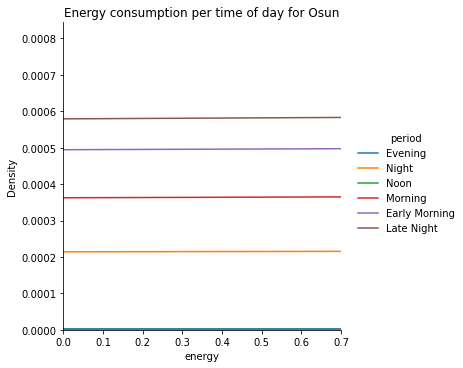

In [25]:
#ENErgy consumption per time of day for osu1

plt.figure(figsize = (12,8))
sns.displot(osu1, x="energy", hue="period", kind="kde", bw_adjust=7)
plt.xlim(0,0.7)

plt.title("Energy consumption per time of day for Osun", fontsize=12)
plt.savefig('Energy consumption per time of day for Osun.png',  bbox_inches='tight' )

plt.show()

<Figure size 864x576 with 0 Axes>

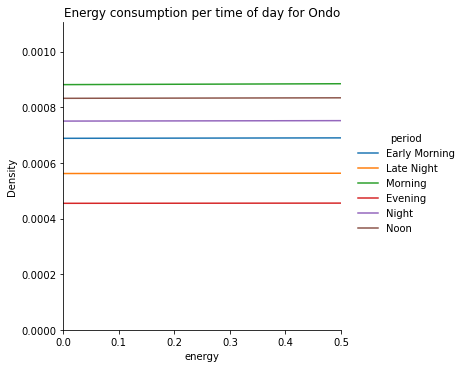

In [26]:
#ENErgy consumption per time of day for ond5

plt.figure(figsize = (12,8))
sns.displot(ond5, x="energy", hue="period", kind="kde", bw_adjust=7)
plt.xlim(0,0.5)

plt.title("Energy consumption per time of day for Ondo", fontsize=12)
plt.savefig('Energy consumption per time of day for Osun.png',  bbox_inches='tight' )

<AxesSubplot:>

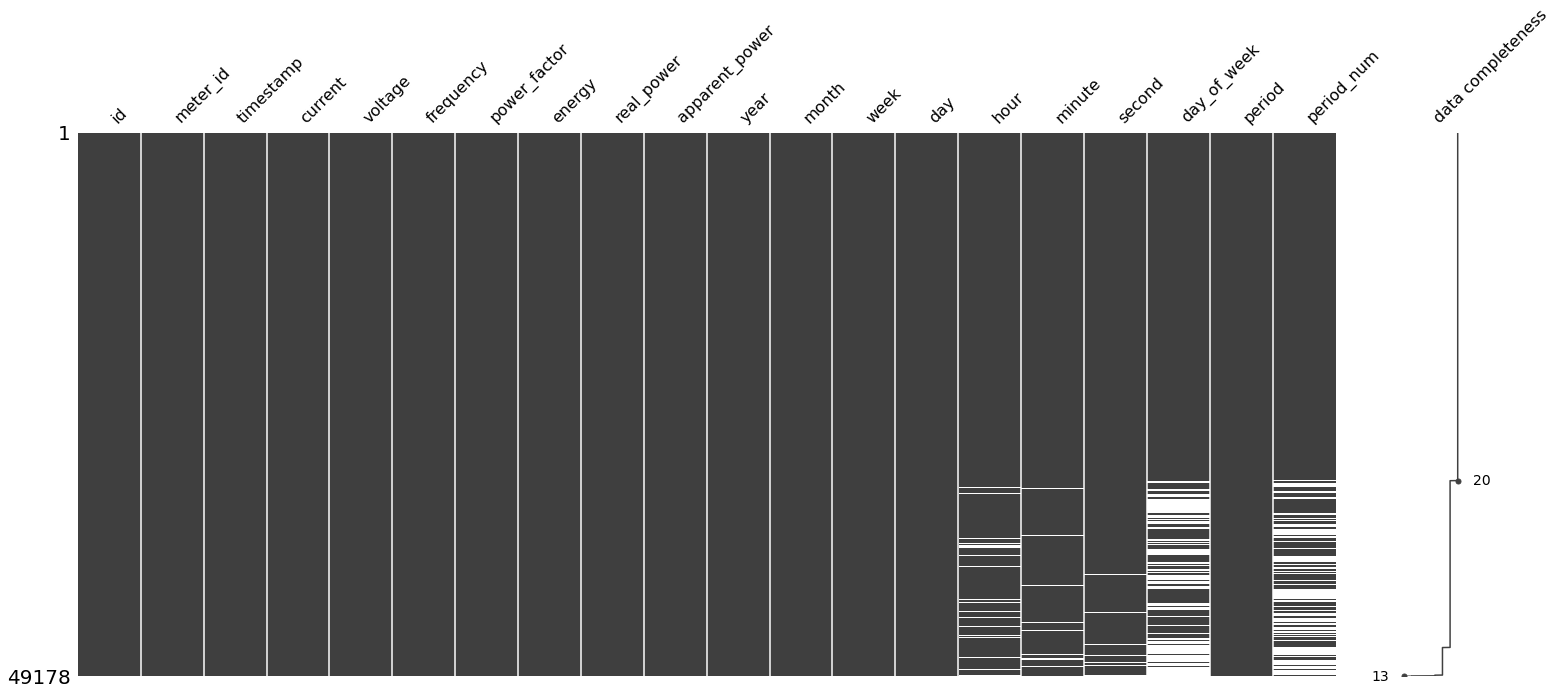

In [27]:
osuu= osu1.replace(0, np.nan)

import missingno as msno
msno.matrix(osuu, labels= True,sort='descending')

In [28]:
#df_grp_states function to group into states

di = {'LAG001': 'LAG', 'ADA001': 'ADA', 'OSU001':'OSU', 'OND002':'OND',
 'OND005':'OND', 'OND014':'OND','OSU003':'OSU', 'ADA010':'ADA',
 'ADA009':'ADA', 'ADA008':'ADA', 'ADA007':'ADA', 'ADA005':'ADA',
'ADA004':'ADA', 'ADA003':'ADA', 'ADA002':'ADA', 'OND001':'OND',
 'OND008':'OND', 'OND006':'OND','OND016':'OND', 'OYO003':'OYO',
 'OYO001':'OYO', 'OND007':'OND','OSU002':'OSU', 'OND012':'OND',
'OND018':'OND', 'OND010':'OND', 'OYO002':'OYO',
 'OSN001':'OSN', 'LAG002':'LAG'}

df_grp_states = df.replace({"meter_id": di})
df_grp_states['meter_id'].unique()

array(['LAG', 'ADA', 'OSU', 'OND', 'OYO', 'OSN'], dtype=object)

In [29]:
#create a variable to collect each location data

grp = df_grp_states.groupby('meter_id')#group each state by meter_id
grp_lag = grp.get_group('LAG') #collect data for lag
grp_ada = grp.get_group('ADA') #collect data for ada
grp_osu = grp.get_group('OSU') #collect data for osu
grp_ond = grp.get_group('OND') #collect data for ond
grp_oyo = grp.get_group('OYO') ##collect data for oyo
grp_osn = grp.get_group('OSN') #collect data for osn

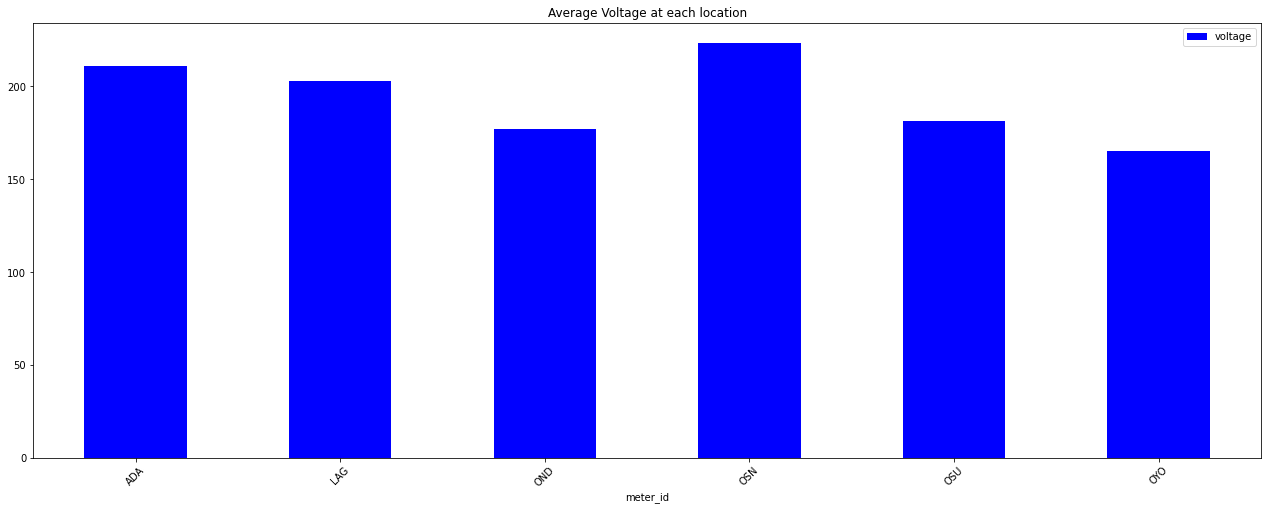

In [30]:
#plot average voltage per state

table = pd.pivot_table(df_grp_states, values = 'voltage', index=['meter_id'], aggfunc ='mean')
table.plot.bar(color= ("blue"), rot =0, figsize =(22,8))
plt.title("Average Voltage at each location")
plt.xticks(rotation= 45)
plt.show()

In [31]:
#How many zero voltage are there in each state

count = (grp_lag['voltage'] == 0).sum()
print('Count of zeros in Lag: ', count)
count = (grp_ada['voltage'] == 0).sum()
print('Count of zeros in Ada : ', count)
count = (grp_osu['voltage']== 0).sum()
print('Count of zeros in Osu : ', count)
count = (grp_ond['voltage']== 0).sum()
print('Count of zeros in Ond : ', count)
count = (grp_oyo['voltage']== 0).sum()
print('Count of zeros in Oyo : ', count)
count = (grp_osn['voltage']== 0).sum()
print('Count of zeros in Osn : ', count)

Count of zeros in Lag:  0
Count of zeros in Ada :  0
Count of zeros in Osu :  33
Count of zeros in Ond :  1328
Count of zeros in Oyo :  1
Count of zeros in Osn :  0


In [32]:
#convert zero volt to nan to allow for viz

grp_ond['voltage'].replace(to_replace= 0, value =np.nan, inplace=True )
grp_osu['voltage'].replace(to_replace= 0, value =np.nan, inplace=True )

<AxesSubplot:>

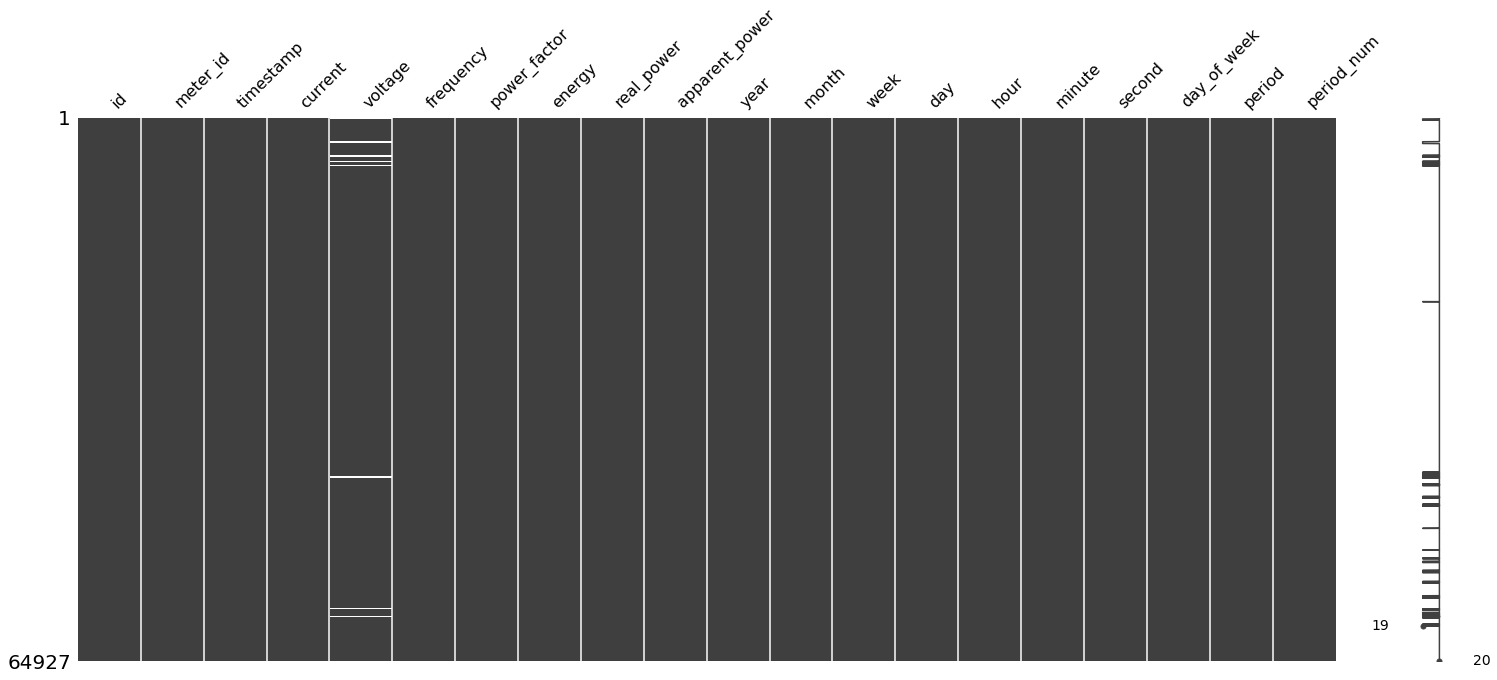

In [33]:
#plot zero voltage for ondo state

import missingno as msno
msno.matrix(grp_ond)

<AxesSubplot:>

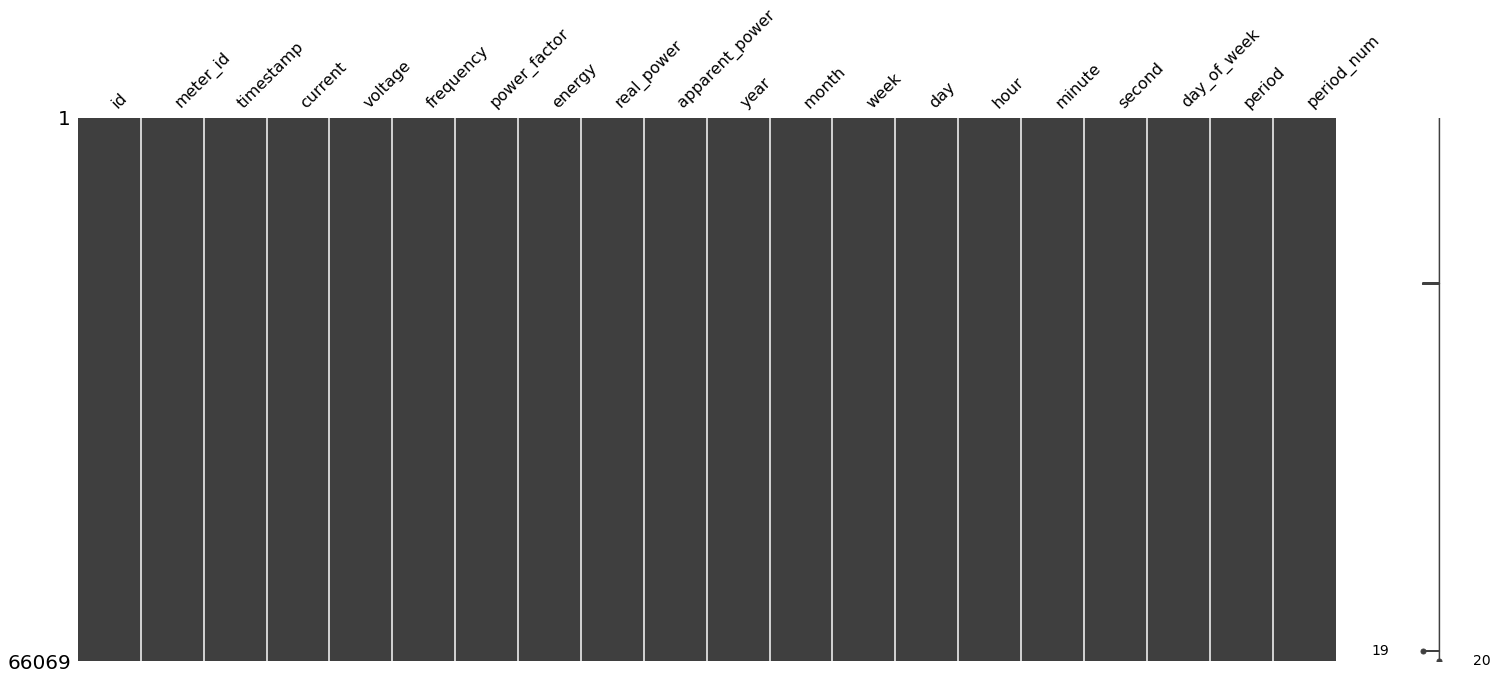

In [34]:
#plot zero voltage for osun state

import missingno as msno
msno.matrix(grp_osu)